# Feature Extraction Methods

## Imports

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import skimage.feature as sk

## Histogram

### Grayscale Histogram

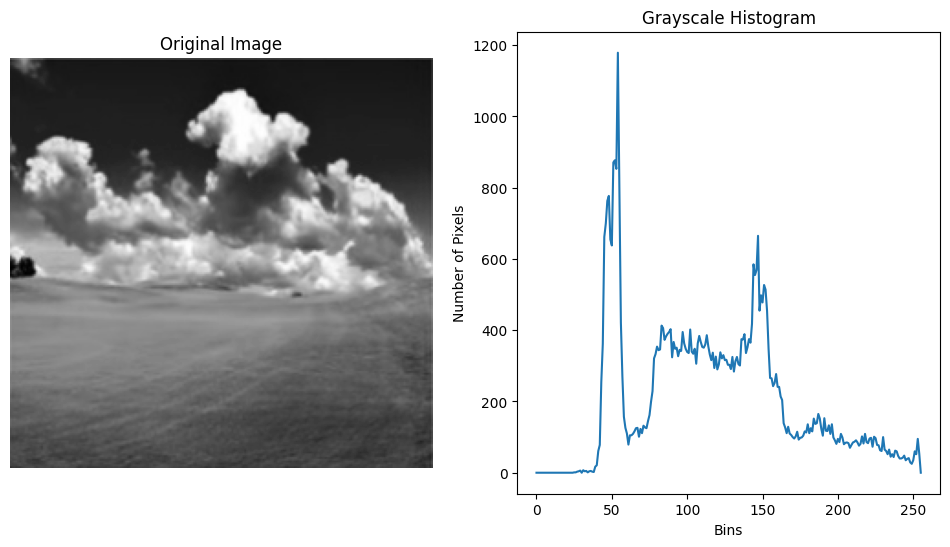

In [3]:
# Read an image and convert it to grayscale
image = cv2.imread("images/nature.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# calculate histogram
hist = cv2.calcHist(images = [image], channels = [0], mask = None, histSize = [256], ranges = [0,255])

# Plot original image and histogram graph
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Grayscale Histogram")
plt.xlabel("Bins")
plt.ylabel("Number of Pixels")
plt.plot(hist)
plt.show()

### RGB Color Histogram

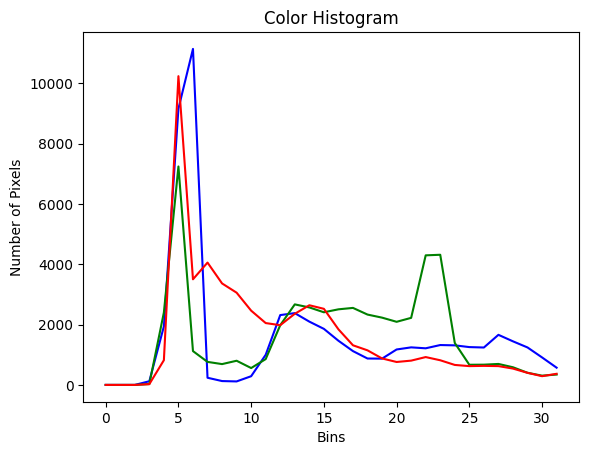

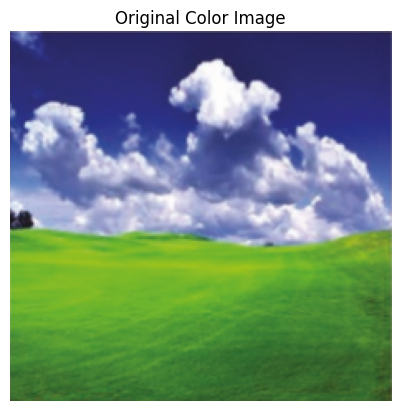

In [9]:
# Read a color image
image = cv2.imread("images/nature.png")

#Remember OpenCV stores color in BGR sequence instead of RBG.
colors = ("blue", "green", "red")
# calculate histogram
for i, color in enumerate(colors):
    hist = cv2.calcHist(images=[image], channels=[i], mask=None, histSize=[32], ranges=[0,256])
    # Plot histogram graph
    plt.plot(hist, color=color)

# Plot histogram graph
plt.title("Color Histogram")
plt.xlabel("Bins")
plt.ylabel("Number of Pixels")
plt.show()

# plot original image
plt.title("Original Color Image")
plt.axis("off")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

### Histogram Equalizer

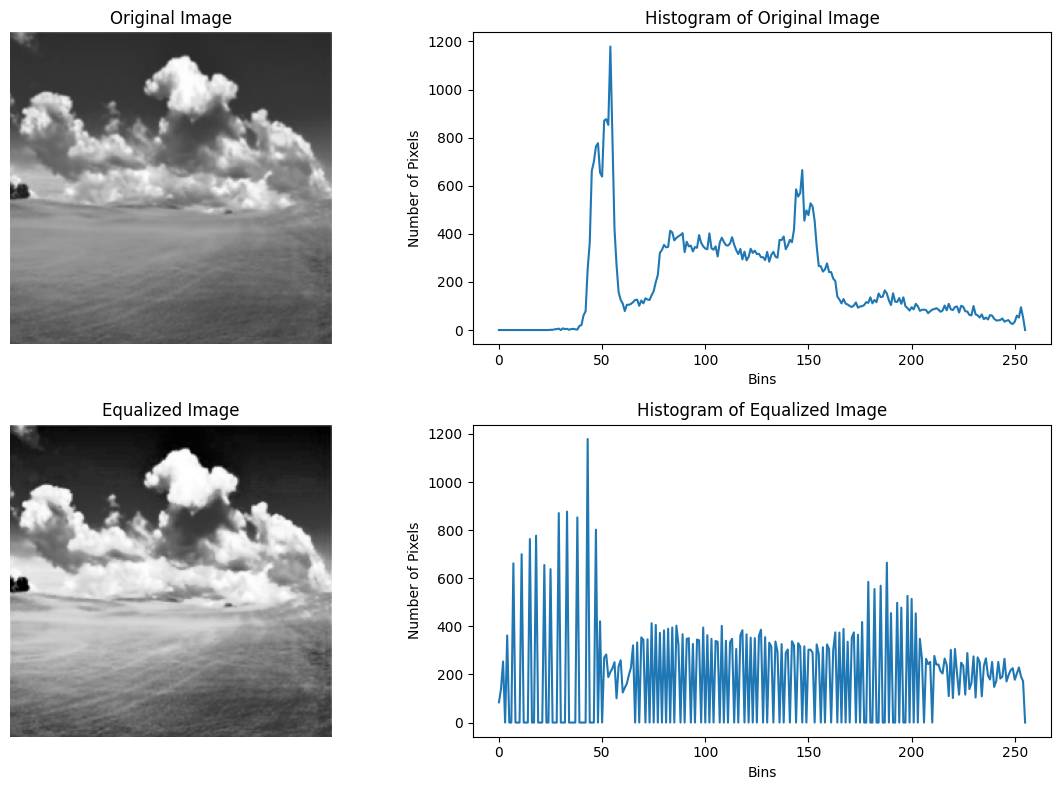

In [11]:
# Read an image and convert it into grayscale
image = cv2.imread("images/nature.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# calculate histogram of the original image
hist = cv2.calcHist([image], [0], None, [256], [0,255])

equalizedImage = cv2.equalizeHist(image)

# calculate histogram of the original image
histEqualized = cv2.calcHist([equalizedImage], [0], None, [256], [0,255])

# plot on one row the original and it's histogram and the equalized image and it's histogram on another row
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

plt.subplot(2, 2, 2)
plt.plot(hist)
plt.title("Histogram of Original Image")
plt.xlabel("Bins")
plt.ylabel("Number of Pixels")

plt.subplot(2, 2, 3)
plt.imshow(cv2.cvtColor(equalizedImage, cv2.COLOR_BGR2RGB))
plt.title("Equalized Image")
plt.axis("off")

plt.subplot(2, 2, 4)
plt.plot(histEqualized)
plt.title("Histogram of Equalized Image")
plt.xlabel("Bins")
plt.ylabel("Number of Pixels")

plt.tight_layout()
plt.show()

## GLCM

### GLCM Calculation

[[[[ 0  0]]

  [[ 0  0]]

  [[ 0  0]]

  ...

  [[ 0  0]]

  [[ 0  0]]

  [[ 0  0]]]


 [[[ 0  0]]

  [[ 0  0]]

  [[ 0  0]]

  ...

  [[ 0  0]]

  [[ 0  0]]

  [[ 0  0]]]


 [[[ 0  0]]

  [[ 0  0]]

  [[ 0  0]]

  ...

  [[ 0  0]]

  [[ 0  0]]

  [[ 0  0]]]


 ...


 [[[ 0  0]]

  [[ 0  0]]

  [[ 0  0]]

  ...

  [[22 39]]

  [[21 23]]

  [[ 2  0]]]


 [[[ 0  0]]

  [[ 0  0]]

  [[ 0  0]]

  ...

  [[28 22]]

  [[ 9 22]]

  [[ 0  2]]]


 [[[ 0  0]]

  [[ 0  0]]

  [[ 0  0]]

  ...

  [[ 2  1]]

  [[ 0  1]]

  [[ 0  0]]]]


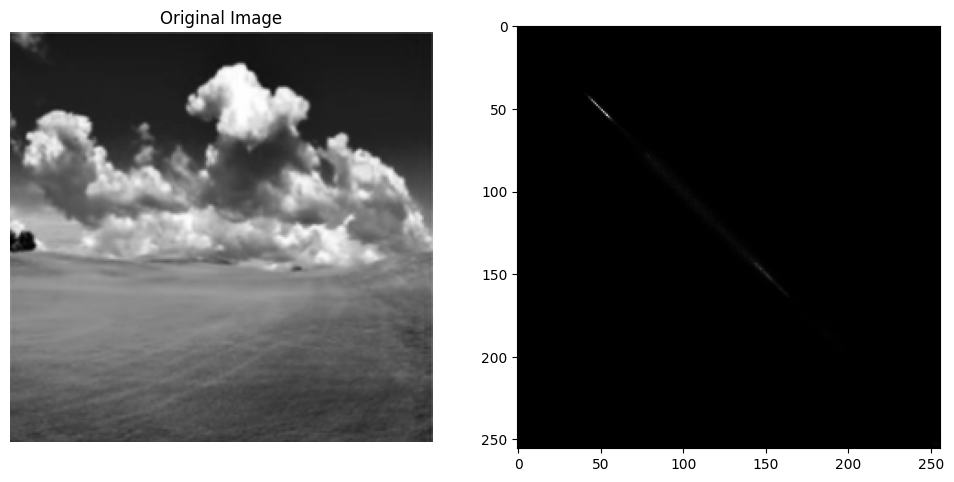

In [25]:
#Read an image from the disk and convert it into grayscale
image = cv2.imread("images/nature.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#Calculate GLCM of the grayscale image
glcm = sk.graycomatrix(image=image, distances=[2], angles=[0, np.pi/2])
print(glcm)

# show the glcm in a more readable format and the original image
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(glcm[:, :, 0, 0], cmap='gray')

### Calculation of Image Statistics

In [26]:
#Read an image from the disk and convert it into grayscale
image = cv2.imread("images/nature.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#Calculate GLCM of the grayscale image
glcm = sk.graycomatrix(image=image, distances=[2], angles=[0, np.pi/2])
#Calculate Contrast
contrast = sk.graycoprops(glcm)
print("Contrast:",contrast)

#Calculate 'dissimilarity'
dissimilarity = sk.graycoprops(glcm, prop='dissimilarity')
print("Dissimilarity: ", dissimilarity)

#Calculate 'homogeneity'
homogeneity = sk.graycoprops(glcm, prop='homogeneity')
print("Homogeneity: ", homogeneity)

#Calculate 'ASM'
ASM = sk.graycoprops(glcm, prop='ASM')
print("ASM: ", ASM)

#Calculate 'energy'
energy = sk.graycoprops(glcm, prop='energy')
print("Energy: ", energy)

#Calculate 'correlation'
correlation = sk.graycoprops(glcm, prop='correlation')
print("Correlation: ", correlation)

Contrast: [[202.48658765 279.7033657 ]]
Dissimilarity:  [[6.22255147 8.62279162]]
Homogeneity:  [[0.37248274 0.25338401]]
ASM:  [[0.00187146 0.00132597]]
Energy:  [[0.04326038 0.03641393]]
Correlation:  [[0.9611508  0.94627199]]


## HOGs

Image Dimension (239, 429)
Feature Vector Dimension: (52416,)


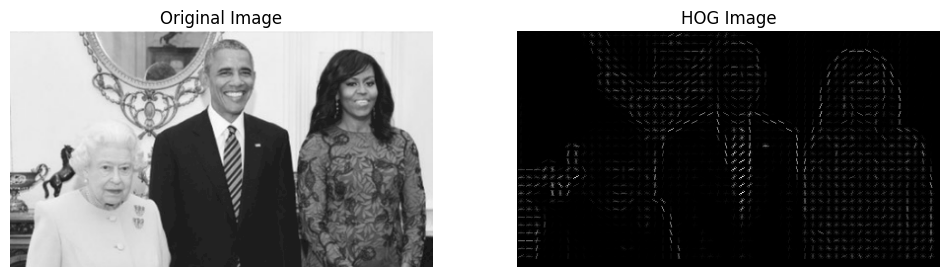

In [29]:
#Load an image from the disk
image = cv2.imread("images/obama_with_people.png", cv2.IMREAD_GRAYSCALE)
#Resize the image.
# image = cv2.resize(image,(int(image.shape[0]/5),int(image.shape[1]/5)))

# HOG calculation
(HOG, hogImage) = sk.hog(image=image, 
                        orientations=9, 
                        pixels_per_cell=(8, 8), 
                        cells_per_block=(2, 2), 
                        visualize=True, 
                        transform_sqrt=True, 
                        block_norm="L2-Hys", 
                        feature_vector=True)

print("Image Dimension",image.shape)
print("Feature Vector Dimension:", HOG.shape)

#showing the original and HOG images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(hogImage, cmap="gray")
plt.title("HOG Image")
plt.axis("off")

plt.show()

## LBP

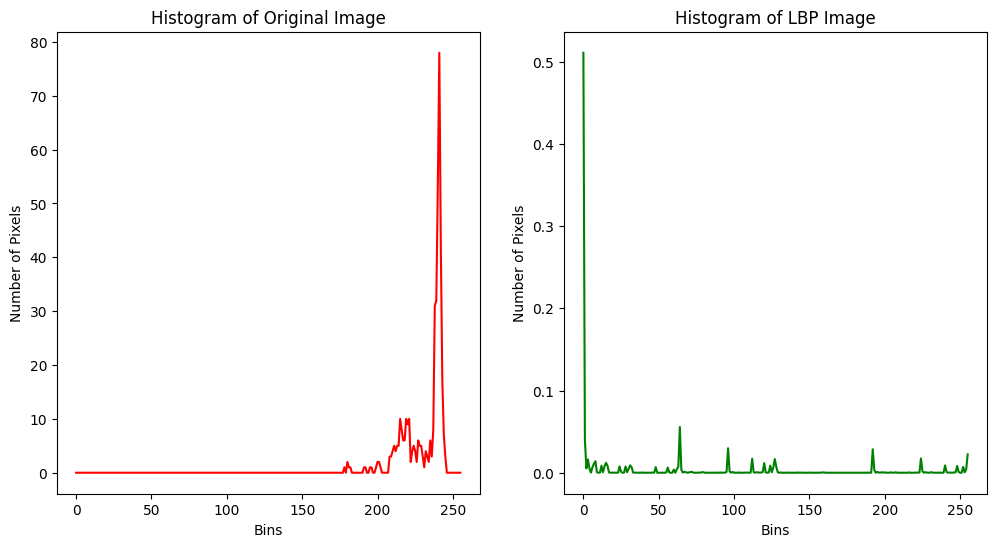

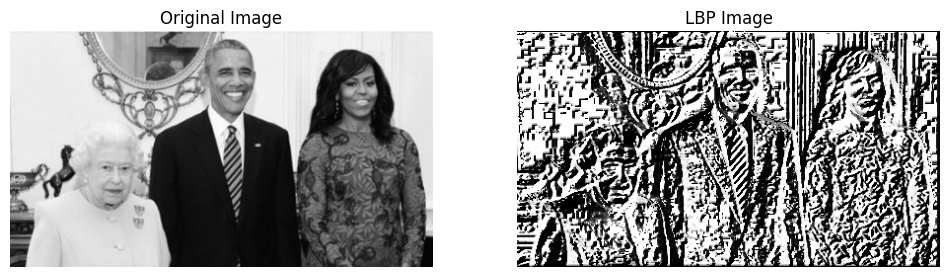

In [34]:
#Load an image from the disk, resize and convert to grayscale
image = cv2.imread("images/obama_with_people.png")
# image = cv2.resize(image, (int(image.shape[0]/5), int(image.shape[1]/5)))
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# calculate Histogram of original image and plot it
originalHist = cv2.calcHist(images=image, channels=[0], mask=None, histSize=[256], ranges=[0,256])

# Calculate LBP image and histogram over the LBP, then plot the histogram
radius = 3
points = 3*8
# LBP calculation
lbp = sk.local_binary_pattern(image, points, radius, method='default')
"""
Notice that we use NumPy histogram() function. If you try to use the cv2.calcHist() function for the LBP image,
you will receive an error message saying “-210 Unsupported format or combination of formats.” 
This is because the output format of local_binary_pattern() is different and not supported by OpenCV calcHist() function. 
For that reason, we are using NumPy histogram() function
"""
lbpHist, _ = np.histogram(a=lbp, density=True, bins=256, range=(0, 256))

# Showing the histogram of original image and LBP image
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(originalHist, color='r')
plt.title("Histogram of Original Image")
plt.xlabel("Bins")
plt.ylabel("Number of Pixels")

plt.subplot(1, 2, 2)
plt.plot(lbpHist, color='g')
plt.title("Histogram of LBP Image")
plt.xlabel("Bins")
plt.ylabel("Number of Pixels")

plt.show()

# showing the original and LBP images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap="gray")
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(lbp, cmap="gray")
plt.title("LBP Image")
plt.axis("off")

plt.show()